Часть I

1)
p(y) - априорная вероятность, что подсудимый виновен,
p(x) - вероятность, что у подсудимого редкая группа крови,
p(x|y) - вероятность, при условии виновности подсудимого у него будет редкая группа крови = 1 по условию,
p(x|~y) - вероятность, при условии невиновности подсудимого (любой человек в городе кроме реального преступника) у него будет редкая группа крови = 0.01 по условию,
p(y|x) - вероятность, при условии редкой крови у подсудимого, что он виновен - то, что нужно найти.

p(y|x) = 1 / (1 + p(x|~y) * p(~y) / p(x|y) * p(y)) = 1 / (1 + 0.01 * p(~y) / p(y))

Прокурор оценил вероятность того, что невиновный человек имеет другую группу крови (не редкую) 1 - p(x|~y).
Прокурор должен был оценить вероятность того, что подсудимый виновен при условии, что у него редкая группа крови p(y|x). Для этого прокурор сначала должен был оценить априорную вероятность виновности подсудимого p(y). Оценка прокурора совпадает с корректно расчитанной условной вероятностью при p(y) ~= 0.5.

2) 
Адвокат оценил вероятность того, что случайный житель города с редкой группой крови -- убийца. Оценка адвоката совпадает с корректно расчитанной условной вероятностью в том случае, если p(y) ~= 10^-6 (то есть подсудимый выбран абсолютно случайным образом из всех жителей города). Он должен был учесть, что подсудимого выбирали не случайным образом из всех жителей города (и без учета группы крови). То есть априорная вероятность виновности подсудимого p(y) >> 10^-6. Адвокат должен был оценить эту вероятность как можно ниже, чтобы совпадение группы крови не смеестило ее слишком сильно.

3)


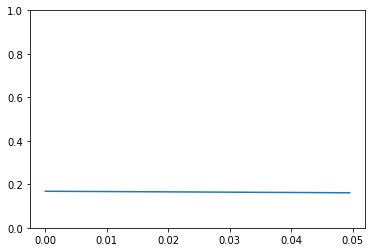

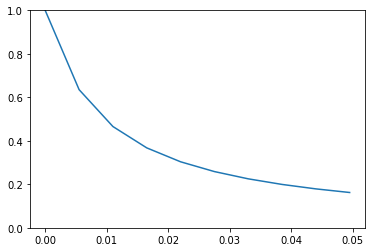

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# условная вероятность, что человек болен при положительном тесте
def probability_positive(fp, fn):
    return 1.0/(1.0+99.0*fp/(1.0-fn))

FP = 0.05
fn_arr = [fn for fn in np.arange(1e-5, 0.05, 0.0055)]
cond_prob = [probability_positive(FP, _) for _ in fn_arr]

plt.plot(fn_arr, cond_prob)
plt.ylim([0,1])
plt.show()

FN = 0.05
fp_arr = [fp for fp in np.arange(1e-5, 0.05, 0.0055)]
cond_prob_2 = [probability_positive(_, FN) for _ in fp_arr]

plt.plot(fp_arr, cond_prob_2)
plt.ylim([0,1])
plt.show()

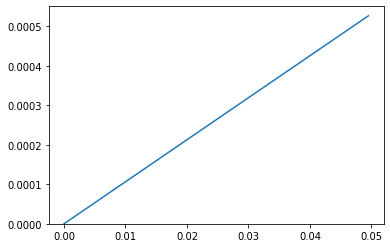

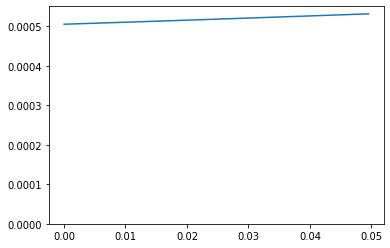

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# условная вероятность, что человек болен при отрицательном тесте
def probability_negative(fp, fn):
    return 1.0/(1.0+99.0*(1-fp)/fn)

FP = 0.05
fn_arr = [fn for fn in np.arange(1e-5, 0.05, 0.0055)]
cond_prob = [probability_negative(FP, _) for _ in fn_arr]

plt.plot(fn_arr, cond_prob)
plt.ylim([0, 0.00055])
plt.show()

FN = 0.05
fp_arr = [fp for fp in np.arange(1e-5, 0.05, 0.0055)]
cond_prob_2 = [probability_negative(_, FN) for _ in fp_arr]

plt.plot(fp_arr, cond_prob_2)
plt.ylim([0, 0.00055])
plt.show()

Можно сделать вывод, что большее влияние на качество теста оказывает ошибка False Positive. Уменьшение кол-ва FP позволяет существенно улучшить процент правильного диагноза в случае положительного теста. При этом в случае отрицательного теста вероятность ложноотрицательного диагноза исходно очень низкая ~ 5 * 10^-4, поэтому дополнительно снижать ее нецелесообразно.

Часть II

2.a

In [17]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_csv("owid-covid-data.csv")

In [12]:
START_DATE = '2020-03-03'
COUNTRY = "RUS"

ru_data = data[(data.iso_code==COUNTRY) & (data.date>=START_DATE)].copy()
ru_data = ru_data.sort_values("date").iloc[:50]
# Заменим для удобства new_cases== 0.0 -> 1.0
ru_data['new_cases'].replace(0., 1., inplace=True)
# ru_data.loc[ru_data["new_cases"]==0.0, "total_cases"] = ru_data.loc[ru_data["new_cases"]==0.0, "total_cases"] + 1
# ru_data.loc[ru_data["new_cases"]==0.0, "new_cases"] = ru_data.loc[ru_data["new_cases"]==0.0, "new_cases"] + 1
ru_data.reset_index(inplace=True)

In [13]:
ru_data.shape

(50, 60)

In [64]:
from sklearn.linear_model import Ridge, BayesianRidge

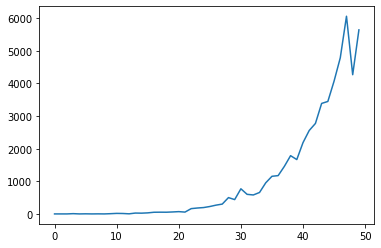

In [15]:
ru_data["new_cases"].plot();

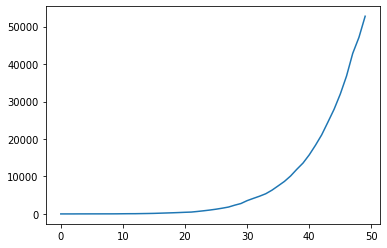

In [23]:
ru_data["total_cases"].plot();

(array([3., 0., 0., 6., 1., 1., 3., 2., 1., 3., 2., 3., 2., 3., 2., 3., 4.,
        3., 4., 4.]),
 array([ 1.09861229,  1.58735995,  2.07610761,  2.56485527,  3.05360292,
         3.54235058,  4.03109824,  4.5198459 ,  5.00859356,  5.49734122,
         5.98608888,  6.47483654,  6.9635842 ,  7.45233185,  7.94107951,
         8.42982717,  8.91857483,  9.40732249,  9.89607015, 10.38481781,
        10.87356547]),
 <BarContainer object of 20 artists>)

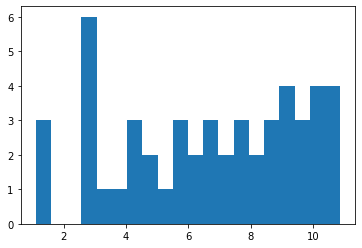

In [21]:
plt.hist(np.log(ru_data["total_cases"]), bins=20)

In [54]:
y = ru_data["total_cases"]

In [55]:
y_log = np.log(y)

In [56]:
X = np.arange(len(y)).reshape(-1, 1)

In [57]:
regr = Ridge()

In [58]:
regr.fit(X, y_log)

Ridge()

In [59]:
regr.intercept_, regr.coef_

(1.8212036708332127, array([0.19827187]))

In [60]:
pred_log = regr.predict(X)

In [61]:
noise_std = np.std(pred_log - y_log)

In [63]:
noise_std

0.3490423141291704

2.b

In [88]:
mu_0, sigma_0 = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])

In [89]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [92]:
mu, sigma = mu_0, sigma_0
for x, y in zip(X.reshape(-1), y_log):
    mu, sigma = bayesian_update(mu, sigma, x, y, noise_std)

In [93]:
mu, sigma

(array([1.81219413, 0.19854949]),
 array([[ 9.41520907e-03, -2.85308936e-04],
        [-2.85308936e-04,  1.16594502e-05]]))